In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fashion_train_df = pd.read_csv('/Users/zovvenug/Desktop/input/fashion-mnist_train.csv', sep = ',')

In [3]:
fashion_test_df = pd.read_csv('/Users/zovvenug/Desktop/input/fashion-mnist_test.csv', sep = ',')

In [4]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [8]:
fashion_train_df.shape

(60000, 785)

In [9]:
fashion_test_df.shape

(10000, 785)

In [10]:
training = np.array(fashion_train_df, dtype = 'float32')

In [11]:
testing = np.array(fashion_test_df, dtype = 'float32')

3.0

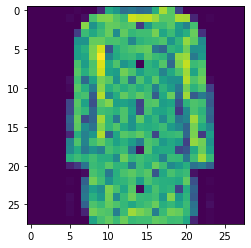

In [12]:
#visualization
import random
i = random.randint(1,60000)
plt.imshow(training[i, 1:].reshape(28,28)) 
label = training[i,0]
label

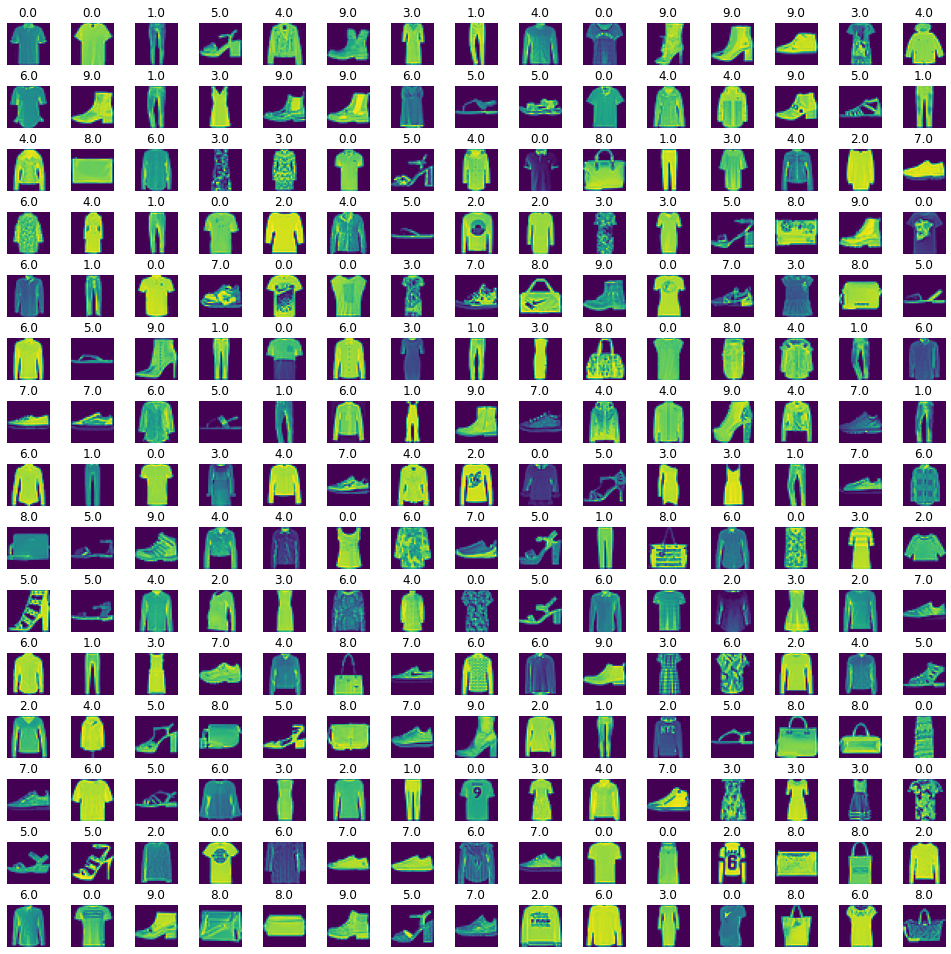

In [13]:
length = 15
width = 15

fig, axes = plt.subplots(length, width, figsize = (17,17))
axes = axes.ravel() #15*15 matrix -> 225 array
n_training = len(training)

for i in np.arange(0, length*width):
    index = np.random.randint(0, n_training)
    axes[i].imshow(training[index, 1:].reshape((28,28)))
    axes[i].set_title(training[index, 0], fontsize = 12)
    axes[i].axis('off')


plt.subplots_adjust(hspace = 0.5)

In [14]:
X_train = training[:, 1:]/255
y_train = training[:, 0]
X_test = testing[:, 1:]/255
y_test = testing[:, 0]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 100)

In [16]:
X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28,28,1))

In [17]:
X_train.shape

(48000, 28, 28, 1)

In [18]:
X_test.shape

(10000, 28, 28, 1)

In [19]:
X_validate.shape

(12000, 28, 28, 1)

In [20]:
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [21]:
#Define CNN model
cnn_model = Sequential()
cnn_model.add(Conv2D(32,3,3,input_shape = (28,28,1), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(units = 32, activation = 'relu'))
cnn_model.add(Dense(units = 10, activation = 'sigmoid'))

In [22]:
#Define optimizer and loss function
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr=0.001), metrics = ['accuracy'])

#Define epochs
epoch = 50

In [23]:
#model training
cnn_model.fit(X_train, 
              y_train, 
              batch_size = 512, 
              epochs = epoch, 
              verbose = 1, 
              validation_data = (X_validate, y_validate))

Epoch 1/50
94/94 [==============================] - 1s 11ms/step - loss: 1.5861 - accuracy: 0.4606 - val_loss: 0.7918 - val_accuracy: 0.7147
Epoch 2/50
94/94 [==============================] - 1s 9ms/step - loss: 0.7027 - accuracy: 0.7449 - val_loss: 0.6318 - val_accuracy: 0.7733
Epoch 3/50
94/94 [==============================] - 1s 9ms/step - loss: 0.6062 - accuracy: 0.7807 - val_loss: 0.5789 - val_accuracy: 0.7904
Epoch 4/50
94/94 [==============================] - 1s 9ms/step - loss: 0.5594 - accuracy: 0.7983 - val_loss: 0.5506 - val_accuracy: 0.7968
Epoch 5/50
94/94 [==============================] - 1s 9ms/step - loss: 0.5289 - accuracy: 0.8081 - val_loss: 0.5148 - val_accuracy: 0.8139
Epoch 6/50
94/94 [==============================] - 1s 9ms/step - loss: 0.5058 - accuracy: 0.8161 - val_loss: 0.5055 - val_accuracy: 0.8184
Epoch 7/50
94/94 [==============================] - 1s 9ms/step - loss: 0.4917 - accuracy: 0.8209 - val_loss: 0.4899 - val_accuracy: 0.8229
Epoch 8/50
94/94 [=

In [26]:
#Evaluate the model
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test accuracy is: {:.3f}' .format(evaluation[1]))

313/313 [==============================] - 0s 941us/step - loss: 0.3579 - accuracy: 0.8671
Test accuracy is: 0.867


In [27]:
predict  = cnn_model.predict_classes(X_test)
predict

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([0, 1, 2, ..., 8, 8, 1])

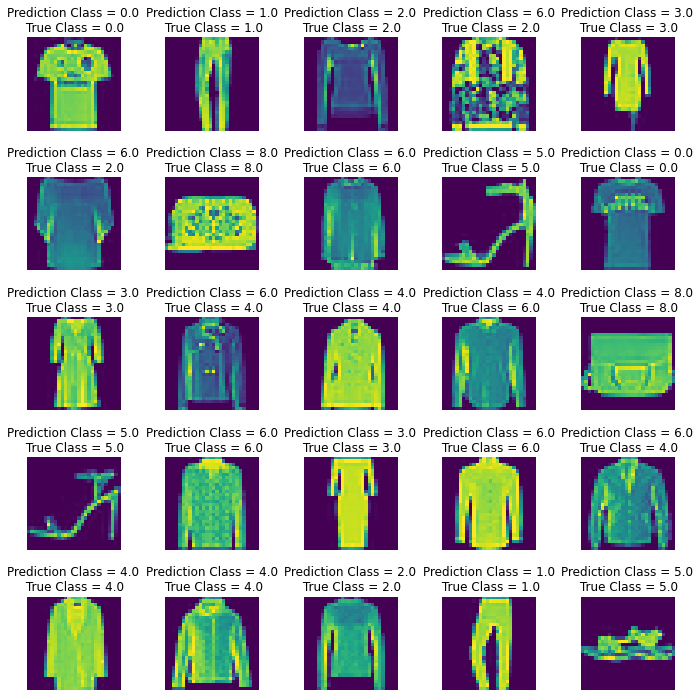

In [28]:
length = 5
width = 5

fig, axes = plt.subplots(length, width, figsize = (12,12))
axes = axes.ravel() #5*5 matrix -> 25 array

for i in np.arange(0, length*width):
    axes[i].imshow(X_test[i].reshape((28,28)))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}" .format(predict[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(hspace = 0.5)

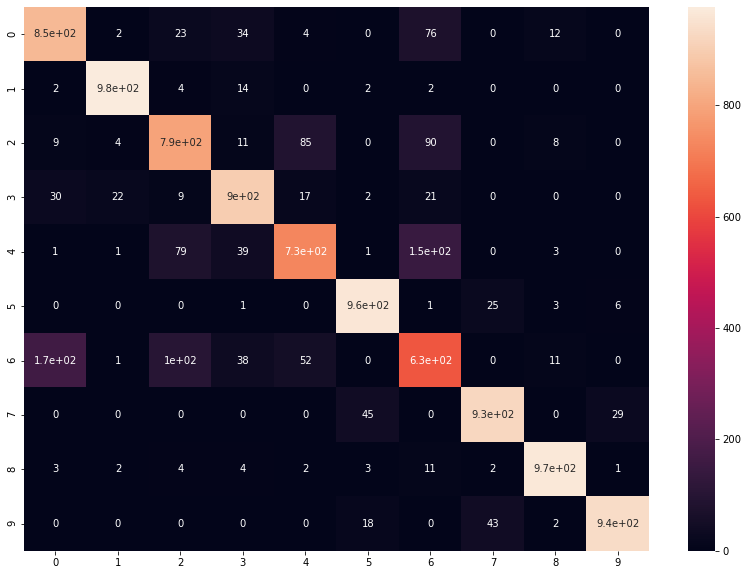

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot = True)

In [35]:
from sklearn.metrics import classification_report

classes = 10
target = ["Class {}" .format(i) for i in range(classes)]
print(classification_report(y_test, predict, target_names = target))

              precision    recall  f1-score   support

     Class 0       0.80      0.85      0.82      1000
     Class 1       0.97      0.98      0.97      1000
     Class 2       0.78      0.79      0.79      1000
     Class 3       0.86      0.90      0.88      1000
     Class 4       0.82      0.73      0.77      1000
     Class 5       0.93      0.96      0.95      1000
     Class 6       0.64      0.63      0.64      1000
     Class 7       0.93      0.93      0.93      1000
     Class 8       0.96      0.97      0.96      1000
     Class 9       0.96      0.94      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

